<h1><center><font size=5><font color='gray'>**CountVectorizer**</font></font></center></h1>

<font size=4><font color='Brown'>**Setting working directory**</font></font>

In [12]:
% cd "C:\Users\vibhanshuv\Downloads\Case Study 1\aclImdb"

C:\Users\vibhanshuv\Downloads\Case Study 1\aclImdb


<font size=4><font color='Brown'>**Importing Dependencies**</font></font>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from wordcloud import WordCloud

<font size=4><font color='Brown'>**Importing CSV Files**</font></font>

In [15]:
train_df=pd.read_csv('Train.csv',sep=",")
test_df=pd.read_csv('Test.csv',sep=",")

In [16]:
train_df.head(5)

,description,sentiment
0,Story of a man who has unnatural feelings for ...,0
1,Airport '77 starts as a brand new luxury 747 p...,0
2,This film lacked something I couldn't put my f...,0
3,"Sorry everyone,,, I know this is supposed to b...",0
4,When I was little my parents took me along to ...,0


In [17]:
test_df.head(5)

,description,sentiment
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


<font size=4><font color='Brown'>**Reshuffling the dataframe**</font></font>

In [18]:
train_df=train_df.reindex(np.random.permutation(train_df.index))
test_df=test_df.reindex(np.random.permutation(test_df.index))

In [19]:
train_df.head(5)

,description,sentiment
24028,This film is outstanding and wonderfully score...,1
20318,This episode apparently grew out of the cold w...,1
19778,I found this film to funny from the start. Joh...,1
24807,I'll be honest with you...I liked this movie. ...,1
16861,"Everyday we can watch a great number of film, ...",1


<font size=4><font color='Brown'>**Splitting Train and Test dataset**</font></font>

In [20]:
X_train=train_df['description'].str.lower()
X_test=test_df['description'].str.lower()

In [21]:
Y_train=train_df['sentiment']
Y_test=test_df['sentiment']

<font size=4><font color='Brown'>**Applying Word Tokenization**</font></font>

In [22]:
X_train=X_train.apply(word_tokenize)
X_test=X_test.apply(word_tokenize)

In [23]:
X_train.head()

24028    [this, film, is, outstanding, and, wonderfully...
20318    [this, episode, apparently, grew, out, of, the...
19778    [i, found, this, film, to, funny, from, the, s...
24807    [i, 'll, be, honest, with, you, ..., i, liked,...
16861    [everyday, we, can, watch, a, great, number, o...
Name: description, dtype: object

<font size=4><font color='Brown'>**EDA before preprocessing**</font></font>

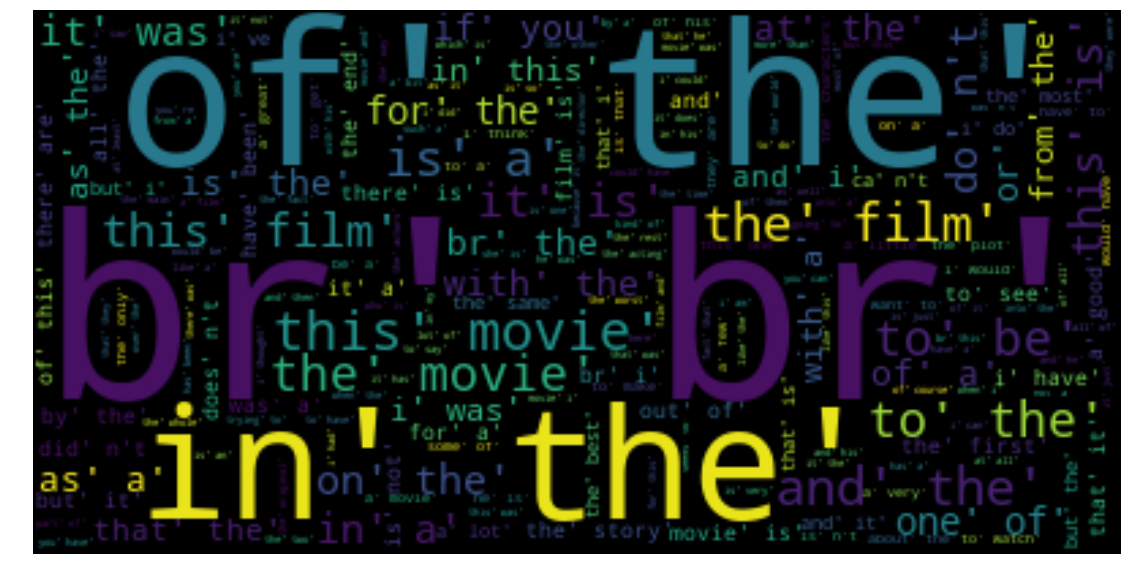

In [24]:
q1=X_train
wordcloud = WordCloud(random_state=0,max_font_size=1000).generate(",".join(map(str, q1)))
plt.figure(figsize=(30,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

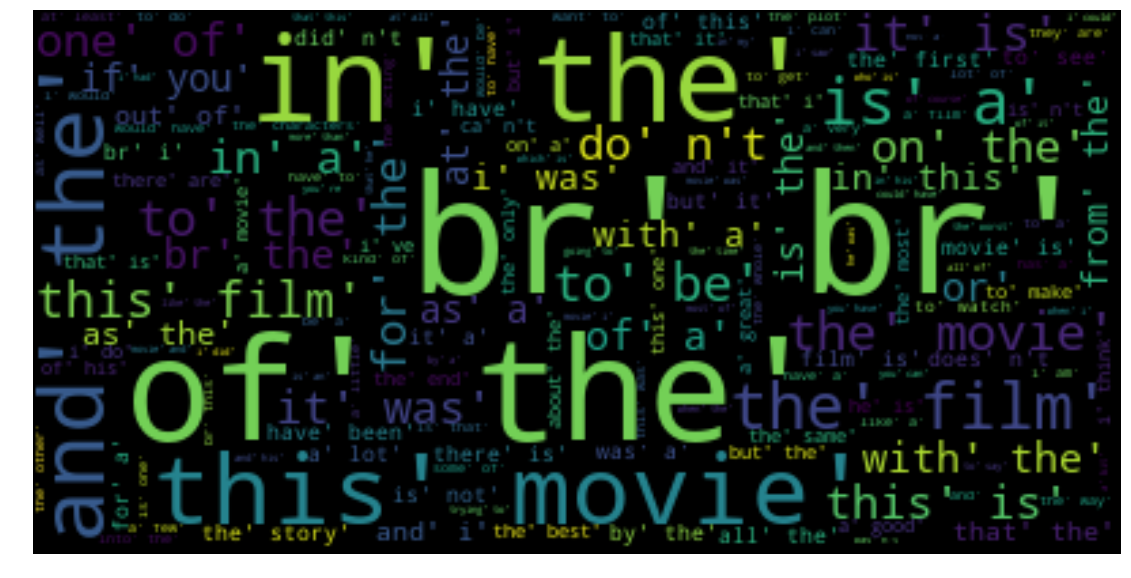

In [25]:
q2=X_test
wordcloud = WordCloud(max_font_size=60).generate(",".join(map(str, q2)))
plt.figure(figsize=(30,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<font size=4><font color='Brown'>**Number of words in each line**</font></font>

In [26]:
train_df['word_count'] = train_df['description'].apply(lambda x: len(str(x).split(" ")))
train_df[['description','word_count']].head(5)

,description,word_count
24028,This film is outstanding and wonderfully score...,73
20318,This episode apparently grew out of the cold w...,124
19778,I found this film to funny from the start. Joh...,51
24807,I'll be honest with you...I liked this movie. ...,99
16861,"Everyday we can watch a great number of film, ...",160


<font size=4><font color='Brown'>**Number of Stopwords in each line**</font></font>

In [27]:
stop = stopwords.words('english')

train_df['stopwords'] = train_df['description'].apply(lambda x: len([x for x in x.split() if x in stop]))
train_df[['description','stopwords']].head()

,description,stopwords
24028,This film is outstanding and wonderfully score...,26
20318,This episode apparently grew out of the cold w...,54
19778,I found this film to funny from the start. Joh...,23
24807,I'll be honest with you...I liked this movie. ...,32
16861,"Everyday we can watch a great number of film, ...",56


<font size=4><font color='Brown'>**Number of Numerics in each line**</font></font>

In [28]:
train_df['numerics'] = train_df['description'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train_df[['description','numerics']].head()

,description,numerics
24028,This film is outstanding and wonderfully score...,0
20318,This episode apparently grew out of the cold w...,0
19778,I found this film to funny from the start. Joh...,0
24807,I'll be honest with you...I liked this movie. ...,0
16861,"Everyday we can watch a great number of film, ...",0


<font size=4><font color='Brown'>**CountVectorizer n_gram(1,1)**</font></font>

In [29]:
q11=X_train
q12=X_test
def identity_tokenizer(text):
    return text

from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(binary='true',tokenizer=identity_tokenizer,ngram_range=(1,1),lowercase=False)
y=cv.fit_transform(q11)
y1=cv.transform(q12)

## Checking Model Accuracy without preprocessing

In [30]:
#Model fitting using Naive Bayes method
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB().fit(y,Y_train)
classifier.score(y1,Y_test)

0.83192

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
from sklearn.model_selection import GridSearchCV
parameters={'C':[1.0,10.0,12.0,20,50,100],'penalty':['l1','l2']}
clf=GridSearchCV(model,param_grid=parameters,cv=3)
clf.fit(y,Y_train)
clf.best_params_
print('best score :{0:.2F}'.format(clf.best_score_))
clf.score(y1,Y_test)

best score :0.88


0.87796

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(y,Y_train)
model.score(y1,Y_test)


0.81372

In [33]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from scipy import sparse
class NbLogisticClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, C=1.0, dual=False, n_jobs=1):
        self.C = C
        self.dual = dual
        self.n_jobs = n_jobs

    def predict(self, x):
        # Verify that model has been fit
        check_is_fitted(self, ['_r', '_clf'])
        return self._clf.predict(x.multiply(self._r))

    def predict_proba(self, x):
        # Verify that model has been fit
        check_is_fitted(self, ['_r', '_clf'])
        return self._clf.predict_proba(x.multiply(self._r))

    def fit(self, x, y):
        # Check that X and y have correct shape
        y = y.values
        x, y = check_X_y(x, y, accept_sparse=True)

        def pr(x, y_i, y):
            p = x[y==y_i].sum(0)
            return (p+1) / ((y==y_i).sum()+1)

        self._r = sparse.csr_matrix(np.log(pr(x,1,y) / pr(x,0,y)))
        x_nb = x.multiply(self._r)
        self._clf = LogisticRegression(C=self.C, dual=self.dual, n_jobs=self.n_jobs).fit(x_nb, y)
        return self

model = NbLogisticClassifier(C=4, dual=True, n_jobs=1).fit(y, Y_train)
model.score(y1,Y_test)

0.88032

In [34]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100)
model.fit(y,Y_train)
model.score(y1,Y_test)

0.83124

In [35]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(20,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=1234, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.fit(y,Y_train)
model.score(y1,Y_test)

0.88544

<font size=4><font color='Brown'>**CountVectorizer n_gram(1,2)**</font></font>

In [36]:
cv=CountVectorizer(binary='true',tokenizer=identity_tokenizer,ngram_range=(1,2),lowercase=False)
y2=cv.fit_transform(q11)
y12=cv.transform(q12)

In [37]:
#Model fitting using Naive Bayes method
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB().fit(y2,Y_train)
classifier.score(y12,Y_test)

0.85632

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
from sklearn.model_selection import GridSearchCV
parameters={'C':[1.0,10.0,12.0,20,50,100],'penalty':['l1','l2']}
clf=GridSearchCV(model,param_grid=parameters,cv=3)
clf.fit(y2,Y_train)
clf.best_params_
print('best score :{0:.2F}'.format(clf.best_score_))
clf.score(y12,Y_test)

best score :0.89


0.90044

In [39]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from scipy import sparse
class NbLogisticClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, C=1.0, dual=False, n_jobs=1):
        self.C = C
        self.dual = dual
        self.n_jobs = n_jobs

    def predict(self, x):
        # Verify that model has been fit
        check_is_fitted(self, ['_r', '_clf'])
        return self._clf.predict(x.multiply(self._r))

    def predict_proba(self, x):
        # Verify that model has been fit
        check_is_fitted(self, ['_r', '_clf'])
        return self._clf.predict_proba(x.multiply(self._r))

    def fit(self, x, y):
        # Check that X and y have correct shape
        y = y.values
        x, y = check_X_y(x, y, accept_sparse=True)

        def pr(x, y_i, y):
            p = x[y==y_i].sum(0)
            return (p+1) / ((y==y_i).sum()+1)

        self._r = sparse.csr_matrix(np.log(pr(x,1,y) / pr(x,0,y)))
        x_nb = x.multiply(self._r)
        self._clf = LogisticRegression(C=self.C, dual=self.dual, n_jobs=self.n_jobs).fit(x_nb, y)
        return self

model = NbLogisticClassifier(C=4, dual=True, n_jobs=1).fit(y2, Y_train)
model.score(y12,Y_test)

0.91604

In [40]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100)
model.fit(y2,Y_train)
model.score(y12,Y_test)

0.83548

In [41]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(20,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=1234, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.fit(y2,Y_train)
model.score(y12,Y_test)

0.90972

<font size=4><font color='Brown'>**CountVectorizer n_gram(1,3)**</font></font>

In [42]:
cv=CountVectorizer(binary='true',tokenizer=identity_tokenizer,ngram_range=(1,3),lowercase=False)
y3=cv.fit_transform(q11)
y13=cv.transform(q12)

In [43]:
#Model fitting using Naive Bayes method
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB().fit(y3,Y_train)
classifier.score(y13,Y_test)

0.86356

In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
from sklearn.model_selection import GridSearchCV
parameters={'C':[1.0,10.0,12.0,20,50,100],'penalty':['l1','l2']}
clf=GridSearchCV(model,param_grid=parameters,cv=3)
clf.fit(y3,Y_train)
clf.best_params_
print('best score :{0:.2F}'.format(clf.best_score_))
clf.score(y13,Y_test)

best score :0.89


0.90224

In [144]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from scipy import sparse
class NbLogisticClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, C=1.0, dual=False, n_jobs=1):
        self.C = C
        self.dual = dual
        self.n_jobs = n_jobs

    def predict(self, x):
        # Verify that model has been fit
        check_is_fitted(self, ['_r', '_clf'])
        return self._clf.predict(x.multiply(self._r))

    def predict_proba(self, x):
        # Verify that model has been fit
        check_is_fitted(self, ['_r', '_clf'])
        return self._clf.predict_proba(x.multiply(self._r))

    def fit(self, x, y):
        # Check that X and y have correct shape
        y = y.values
        x, y = check_X_y(x, y, accept_sparse=True)

        def pr(x, y_i, y):
            p = x[y==y_i].sum(0)
            return (p+1) / ((y==y_i).sum()+1)

        self._r = sparse.csr_matrix(np.log(pr(x,1,y) / pr(x,0,y)))
        x_nb = x.multiply(self._r)
        self._clf = LogisticRegression(C=self.C, dual=self.dual, n_jobs=self.n_jobs).fit(x_nb, y)
        return self

model = NbLogisticClassifier(C=3, dual=True, n_jobs=1).fit(y3, Y_train)
model.score(y13,Y_test)

0.91724

In [47]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100)
model.fit(y3,Y_train)
model.score(y13,Y_test)

0.83688

# Loading Preprocessed data

In [91]:
tr_df=pd.read_csv('pre_train.csv',sep=",")
te_df=pd.read_csv('pre_test.csv',sep=",")

### Shuffling the data

In [109]:
tr_df=tr_df.reindex(np.random.permutation(tr_df.index))
te_df=te_df.reindex(np.random.permutation(te_df.index))

In [110]:
tr_df.head()

,Unnamed: 0,description,sentiment,words,words_sent
18392,18392,i remember liking this more than nausicaa of t...,1,"['remember', 'liking', 'nausicaa', 'valley', '...",remember liking nausicaa valley wind age tone ...
4720,4720,this was the third remake of sleeping with the...,0,"['third', 'remake', 'sleeping', 'eniemy', 'yaa...",third remake sleeping eniemy yaarana 1995 agni...
12549,12549,titanic directed by james cameron presents a f...,1,"['titanic', 'directed', 'james', 'cameron', 'p...",titanic directed james cameron present fiction...
15343,15343,i enjoyed watching this well acted movie very ...,1,"['enjoyed', 'watching', 'well', 'acted', 'movi...",enjoyed watching well acted movie very much we...
20850,20850,this picture for me scores very highly as it i...,1,"['picture', 'score', 'very', 'highly', 'hugely...",picture score very highly hugely enjoyable amu...


In [111]:
X_train2=tr_df['words_sent'].str.lower()
X_test2=te_df['words_sent'].str.lower()

In [112]:
y4=tr_df['sentiment']
y5=te_df['sentiment']

#### Tokenizing the words

In [113]:
X_train2=X_train2.apply(word_tokenize)
X_test2=X_test2.apply(word_tokenize)

#### Creating wordcloud to see the preprocessed data

In [115]:
a11=X_train2
a22=X_test2

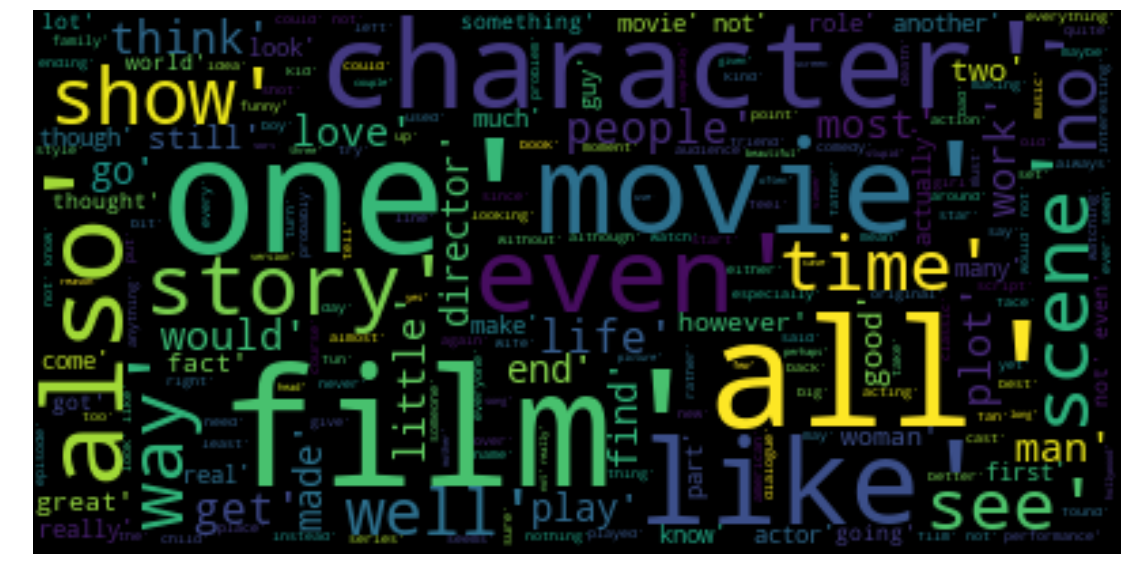

In [116]:
wordcloud = WordCloud(max_font_size=60).generate(",".join(map(str, a22)))
plt.figure(figsize=(30,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

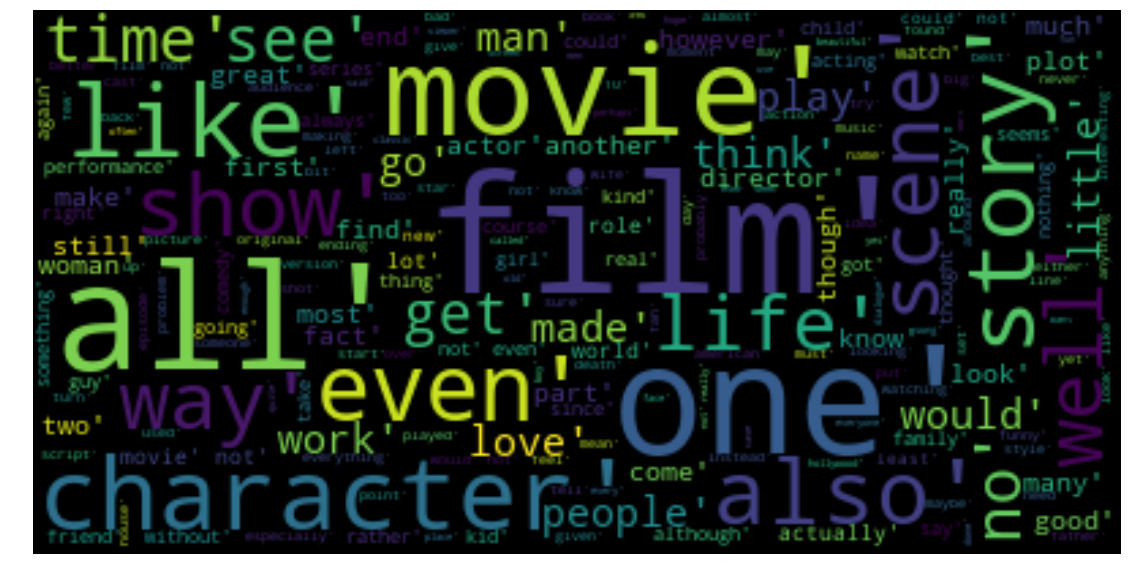

In [117]:
wordcloud = WordCloud(max_font_size=60).generate(",".join(map(str, a11)))
plt.figure(figsize=(30,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<font size=4><font color='Brown'>**Countvectorizer**</font></font>

In [138]:
cv=CountVectorizer(binary='true',tokenizer=identity_tokenizer,ngram_range=(1,3),lowercase=False)
tr=cv.fit_transform(X_train2)
te=cv.transform(X_test2)

<font size=4><font color='Brown'>**Checking the model accuracy after complete preprocessing**</font></font>

In [142]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from scipy import sparse
class NbLogisticClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, C=1.0, dual=False, n_jobs=1):
        self.C = C
        self.dual = dual
        self.n_jobs = n_jobs

    def predict(self, x):
        # Verify that model has been fit
        check_is_fitted(self, ['_r', '_clf'])
        return self._clf.predict(x.multiply(self._r))

    def predict_proba(self, x):
        # Verify that model has been fit
        check_is_fitted(self, ['_r', '_clf'])
        return self._clf.predict_proba(x.multiply(self._r))

    def fit(self, x, y):
        # Check that X and y have correct shape
        y = y.values
        x, y = check_X_y(x, y, accept_sparse=True)

        def pr(x, y_i, y):
            p = x[y==y_i].sum(0)
            return (p+1) / ((y==y_i).sum()+1)

        self._r = sparse.csr_matrix(np.log(pr(x,1,y) / pr(x,0,y)))
        x_nb = x.multiply(self._r)
        self._clf = LogisticRegression(C=self.C, dual=self.dual, n_jobs=self.n_jobs).fit(x_nb, y)
        return self
from sklearn.model_selection import GridSearchCV
model = NbLogisticClassifier( dual=True, n_jobs=1)
parameters={'C':[1.0,2,3,4,5,10.0,12.0,20,50,100,1000,2000]}
clf=GridSearchCV(model,param_grid=parameters,cv=3)
clf.fit(tr,y4 )
clf.best_params_
print('best score :{0:.2F}'.format(clf.best_score_))
clf.score(te,y5)

best score :0.90


0.90544

In [137]:
from sklearn import naive_bayes
list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(tr, y4)
    score_train[count] = bayes.score(tr, y4)
    score_test[count]= bayes.score(te, y5)
    count = count + 1 

matrix = np.matrix(np.c_[list_alpha, score_train, score_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy'])
models.head(n=10)

,alpha,Train Accuracy,Test Accuracy
0,0.00001,1.00000,0.81632
1,0.11001,1.00000,0.85516
2,0.22001,1.00000,0.86204
3,0.33001,1.00000,0.86440
4,0.44001,1.00000,0.86624
5,0.55001,1.00000,0.86788
6,0.66001,1.00000,0.86972
7,0.77001,1.00000,0.87064
8,0.88001,0.99992,0.87184
9,0.99001,0.99988,0.87196


In [146]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
from sklearn.model_selection import GridSearchCV
parameters={'C':[1.0,10.0,12.0,20,50,100],'penalty':['l1','l2']}
clf=GridSearchCV(model,param_grid=parameters,cv=3)
clf.fit(tr,y4)
clf.best_params_
print('best score :{0:.2F}'.format(clf.best_score_))
clf.score(te,y5)

best score :0.89


0.8936

<h1><center><font size=5><font color='violet'>**TFIDF Vectorizer**</font></font></center></h1>

In [126]:
def identity_tokenizer(text):
    return text
tv=TfidfVectorizer(tokenizer=identity_tokenizer,max_df=0.9,min_df=3,ngram_range=(1,2),lowercase=False,use_idf=1,smooth_idf=1, sublinear_tf=1)
X_train3=tv.fit_transform(X_train2)
X_test3=tv.transform(X_test2)

In [132]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from scipy import sparse
class NbLogisticClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, C=1.0, dual=False, n_jobs=1):
        self.C = C
        self.dual = dual
        self.n_jobs = n_jobs

    def predict(self, x):
        # Verify that model has been fit
        check_is_fitted(self, ['_r', '_clf'])
        return self._clf.predict(x.multiply(self._r))

    def predict_proba(self, x):
        # Verify that model has been fit
        check_is_fitted(self, ['_r', '_clf'])
        return self._clf.predict_proba(x.multiply(self._r))

    def fit(self, x, y):
        # Check that X and y have correct shape
        y = y.values
        x, y = check_X_y(x, y, accept_sparse=True)

        def pr(x, y_i, y):
            p = x[y==y_i].sum(0)
            return (p+1) / ((y==y_i).sum()+1)

        self._r = sparse.csr_matrix(np.log(pr(x,1,y) / pr(x,0,y)))
        x_nb = x.multiply(self._r)
        self._clf = LogisticRegression(C=self.C, dual=self.dual, n_jobs=self.n_jobs).fit(x_nb, y)
        return self
from sklearn.model_selection import GridSearchCV
model = NbLogisticClassifier( dual=True, n_jobs=1)
parameters={'C':[1.0,10.0,12.0,20,50,100,1000,2000,5,0.1]}
clf=GridSearchCV(model,param_grid=parameters,cv=3)
clf.fit(X_train3,y4 )
clf.best_params_
print('best score :{0:.2F}'.format(clf.best_score_))
clf.score(X_test3,y5)

best score :0.91


0.90128

In [134]:
from sklearn import naive_bayes
list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train3, y4)
    score_train[count] = bayes.score(X_train3, y4)
    score_test[count]= bayes.score(X_test3, y5)
    count = count + 1 

matrix = np.matrix(np.c_[list_alpha, score_train, score_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy'])
models.head(n=10)

,alpha,Train Accuracy,Test Accuracy
0,0.00001,0.99568,0.82248
1,0.11001,0.97976,0.86820
2,0.22001,0.97508,0.87004
3,0.33001,0.97008,0.87152
4,0.44001,0.96608,0.87288
5,0.55001,0.96312,0.87240
6,0.66001,0.96064,0.87304
7,0.77001,0.95808,0.87324
8,0.88001,0.95596,0.87292
9,0.99001,0.95372,0.87268


In [148]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
from sklearn.model_selection import GridSearchCV
parameters={'C':[1.0,10.0,12.0,20,50,100,1000,2000,5000],'penalty':['l1','l2']}
clf=GridSearchCV(model,param_grid=parameters,cv=3)
clf.fit(X_train3,y4)
clf.best_params_
print('best score :{0:.2F}'.format(clf.best_score_))
clf.score(X_test3,y5)

best score :0.90


0.89868